In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as map
import seaborn as sb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tabulate

In [4]:
cardekho = pd.read_csv('/content/drive/MyDrive/python dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# unique values

In [7]:
cardekho['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [8]:
cardekho['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
cardekho['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [10]:
cardekho['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

# Analysis

In [11]:
#transmission
cardekho.groupby('transmission')['selling_price'].sum()

,selling_price
transmission,
Automatic,630852992
Manual,1557059541


In [12]:
# km driven
km_driven = cardekho.groupby('fuel')['km_driven'].sum()

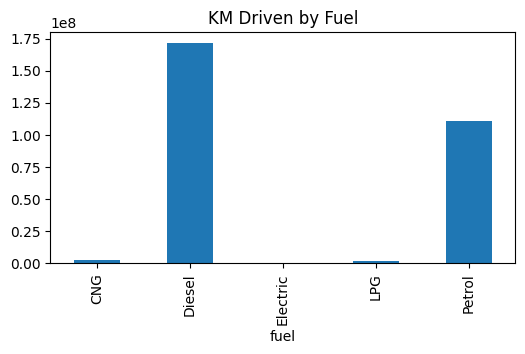

In [13]:
map.figure(figsize=(6,3))
km_driven.plot(kind='bar', title='KM Driven by Fuel')
map.show()


<Axes: title={'center': 'Car Sold By Year'}, xlabel='year'>

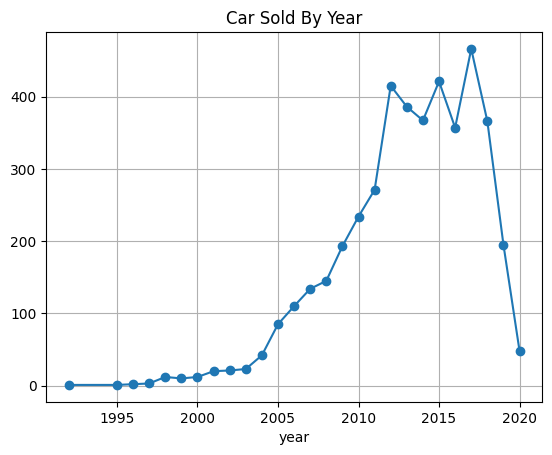

In [14]:
# car sold by year
car_sold_year = cardekho.groupby('year')['name'].count()
car_sold_year.plot(kind='line',marker = 'o',title='Car Sold By Year',grid=True)

In [15]:
#show data before 2011
cardekho[cardekho['year']<2011].shape

(1048, 8)

In [16]:
cardekho[cardekho['year']>2011].shape

(3021, 8)

In [17]:
cardekho['km_driven'].corr(cardekho['selling_price'])

-0.19228863054511436

<Axes: >

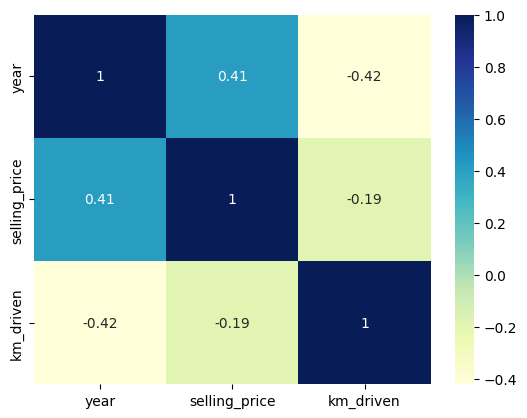

In [18]:
sb.heatmap(cardekho.corr(numeric_only=True),cmap='YlGnBu', annot=True)

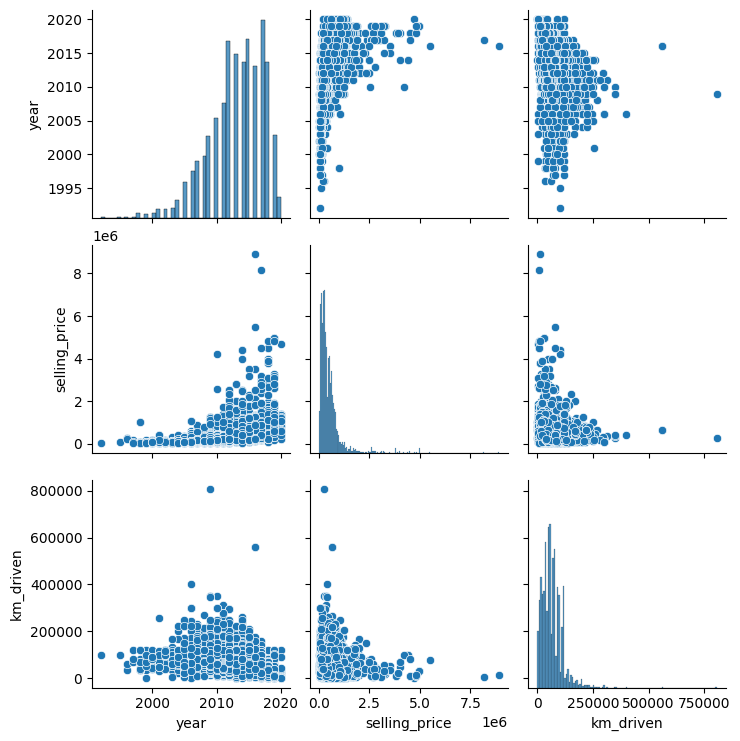

In [19]:
sb.pairplot(cardekho)

In [20]:
# does owner corelated to selling price with fuel
owner_full_price = cardekho.groupby(['owner','fuel'])['selling_price'].sum()

<Axes: title={'center': 'Selling Prive By Owner and Fuel'}, xlabel='owner,fuel'>

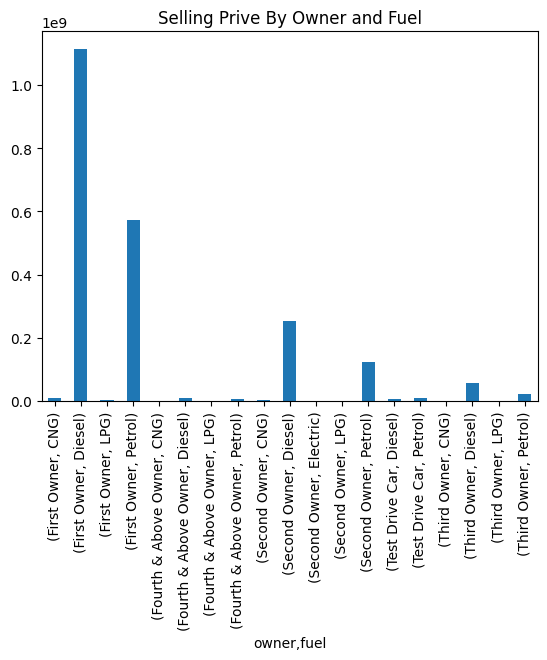

In [21]:
owner_full_price.plot(kind='bar',title='Selling Prive By Owner and Fuel')

# Data Analysis Questions for Practice

**Descriptive Analysis**
2.   What is the average selling price of the cars in the dataset?
3.   What is the average mileage (km_driven) of cars based on their fuel type?
4.   How many unique car names are there in the dataset?



In [22]:
Avg_Selling_price = cardekho['selling_price'].mean()
Avg_Mileage = cardekho['km_driven'].mean()
unique_car_names = cardekho['name'].unique()
print("Avg Selling Price is:",Avg_Selling_price)
print("Avg Mileage is:",Avg_Mileage)
print("Unique Car Names is:",unique_car_names)

Avg Selling Price is: 504127.3117511521
Avg Mileage is: 66215.77741935484
Unique Car Names is: ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


**Distribution Analysis**
1. How is the selling price distributed? Is it skewed?
2. What is the distribution of cars by fuel type?
3. What is the count of cars based on the owner type (e.g., First Owner, Second Owner)?

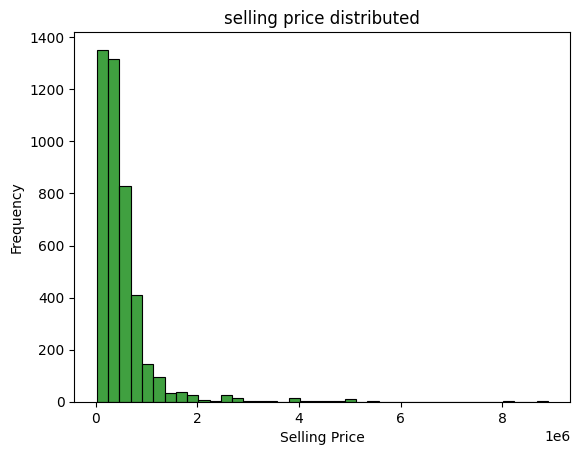

In [23]:
sb.histplot(cardekho['selling_price'],bins=40,color='Green')
map.title('selling price distributed')
map.xlabel('Selling Price')
map.ylabel('Frequency')
map.show()

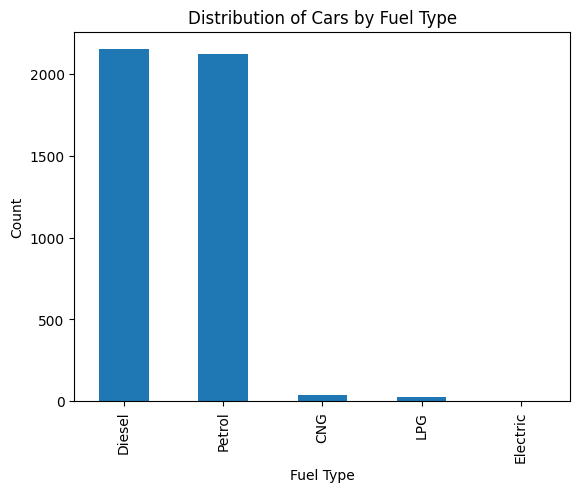

In [24]:
cardekho['fuel'].value_counts().plot(kind='bar',title='fuel density')
map.title('Distribution of Cars by Fuel Type')
map.xlabel('Fuel Type')
map.ylabel('Count')
map.show()

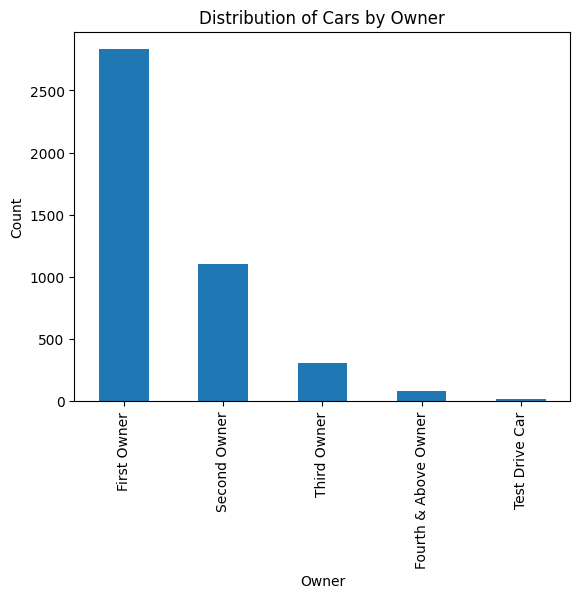

In [25]:
cardekho['owner'].value_counts().plot(kind='bar',title='Distribution of Cars by Owner')
map.xlabel('Owner')
map.ylabel('Count')
map.show()

**Trend Analysis**
1. What are the top 5 most common car models in the dataset?
2. How does the average selling price vary by year of manufacture?
3. Is there a relationship between km_driven and selling_price?

In [26]:
cardekho['name'].value_counts().head(5)

,count
name,
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Maruti Alto LX,35
Hyundai EON Era Plus,35


In [27]:
cardekho.groupby('name')['selling_price'].mean()

,selling_price
name,
Ambassador CLASSIC 1500 DSL AC,120000.0
Ambassador Classic 2000 Dsz,50000.0
Ambassador Grand 1800 ISZ MPFI PW CL,430000.0
Audi A4 1.8 TFSI,1200000.0
Audi A4 2.0 TDI,1295000.0
...,...
Volkswagen Vento Petrol Highline AT,284500.0
Volvo V40 D3 R Design,1975000.0
Volvo XC 90 D5 Inscription BSIV,4500000.0


In [28]:
cardekho['km_driven'].corr(cardekho['selling_price'])

-0.19228863054511436

Comparative Analysis
1. What is the average selling price of cars for each fuel type?
2. How does the selling price compare between Manual and Automatic transmissions?
3. Which seller type (Individual or Dealer) has the highest average selling price?


In [30]:
avg_SP_fuel = cardekho.groupby('fuel')['selling_price'].mean().round(2)

<Axes: title={'center': 'average selling price of cars for each fuel type'}, ylabel='selling_price'>

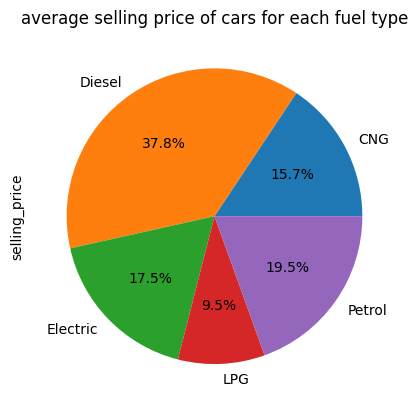

In [31]:
avg_SP_fuel.plot(kind='pie', title="average selling price of cars for each fuel type",autopct='%1.1f%%')

In [32]:
cardekho.groupby('transmission')['selling_price'].sum().round(2)

,selling_price
transmission,
Automatic,630852992
Manual,1557059541


In [33]:
cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [34]:
cardekho.groupby('seller_type')['selling_price'].mean()

,selling_price
seller_type,
Dealer,721822.890342
Individual,424505.419236
Trustmark Dealer,914950.980392


Correlation Analysis
1. What is the correlation between selling_price, year, and km_driven?
2. Does a higher km_driven reduce the selling_price?

In [35]:
cardekho[['selling_price','year','km_driven']].corr()

,selling_price,year,km_driven
selling_price,1.000000,0.413922,-0.192289
year,0.413922,1.000000,-0.419688
km_driven,-0.192289,-0.419688,1.000000


<Axes: >

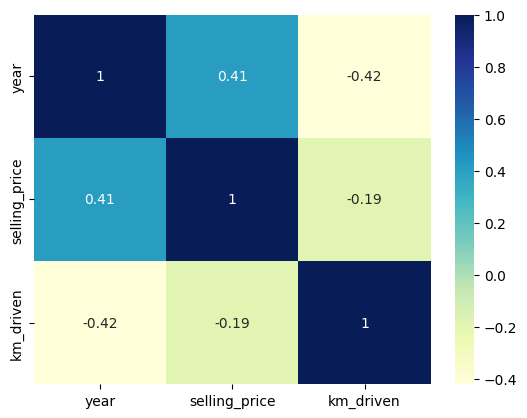

In [36]:
sb.heatmap(cardekho.corr(numeric_only=True),cmap='YlGnBu',annot=True)

**Advanced Analysis**
1. Which fuel type is most common among First Owners?
2. What is the median selling_price of cars for each owner type?
3. Are cars with Automatic transmission generally newer than those with Manual transmission?

In [37]:
cardekho[cardekho['owner'] == 'First Owner'].groupby('owner')['fuel'].value_counts()

owner        fuel  
First Owner  Diesel    1404
             Petrol    1397
             CNG         21
             LPG         10
Name: count, dtype: int64

In [38]:
cardekho.groupby('transmission')['km_driven'].median()

,km_driven
transmission,
Automatic,41210.0
Manual,60000.0


# Feathure Engenering

In [39]:
# feature engenniring: Creating new column in data set to add more information to dataset

In [40]:
cardekho["Cost per km driven"] = (cardekho['km_driven']/cardekho['selling_price']).round(3)

In [41]:
cardekho['km_driven'].sort_values(ascending=True)

,km_driven
1312,1
1715,101
1714,101
1716,101
1291,1000
...,...
2394,350000
3679,400000
4184,560000
525,560000


In [42]:
cardekho['km_driven'].describe()
# describe we get to know value destribution

,km_driven
count,4340.000000
mean,66215.777419
std,46644.102194
min,1.000000
25%,35000.000000
50%,60000.000000
75%,90000.000000
max,806599.000000


In [43]:
# creating a new column where we will assign. KM driven as
# 1. 35000 <
# 2. 90000 < and greater then 1
# 3. 806599 < and greater then 2

In [44]:
def car_driven_status(x):
  if(x<=35000):
    return "KM Driven is less then 35000"
  elif(35000 < x <= 90000):
    return "KM Driven is between 35000 and 90000"
  else:
    return "KM Driven is greater then 90000"

In [45]:
cardekho["car_driven_status"] = cardekho['km_driven'].apply(lambda x:car_driven_status(x))

In [46]:
cardekho[cardekho['km_driven']> 60000][['km_driven','car_driven_status']].head(5)

,km_driven,car_driven_status
0,70000,KM Driven is between 35000 and 90000
2,100000,KM Driven is greater then 90000
4,141000,KM Driven is greater then 90000
5,125000,KM Driven is greater then 90000
9,78000,KM Driven is between 35000 and 90000


In [47]:
#create a putting a new column with car manufacture
cardekho['car manufacture'] = cardekho['name'].str.split().str[0]

In [48]:
cardekho.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Cost per km driven,car_driven_status,car manufacture
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,1.167,KM Driven is between 35000 and 90000,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0.370,KM Driven is between 35000 and 90000,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0.167,KM Driven is greater then 90000,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0.184,KM Driven is between 35000 and 90000,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0.313,KM Driven is greater then 90000,Honda


In [49]:
#how many unique care manufature are there
cardekho['car manufacture'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [50]:
# bassed on new data of car_driven_status	and car manufacture lets find something new

In [51]:
# how many are the number of the car_driven_status
cardekho.groupby('car_driven_status')['name'].count()

,name
car_driven_status,
KM Driven is between 35000 and 90000,2221
KM Driven is greater then 90000,960
KM Driven is less then 35000,1159


<Axes: title={'center': 'Volume of car driven status'}, xlabel='car_driven_status'>

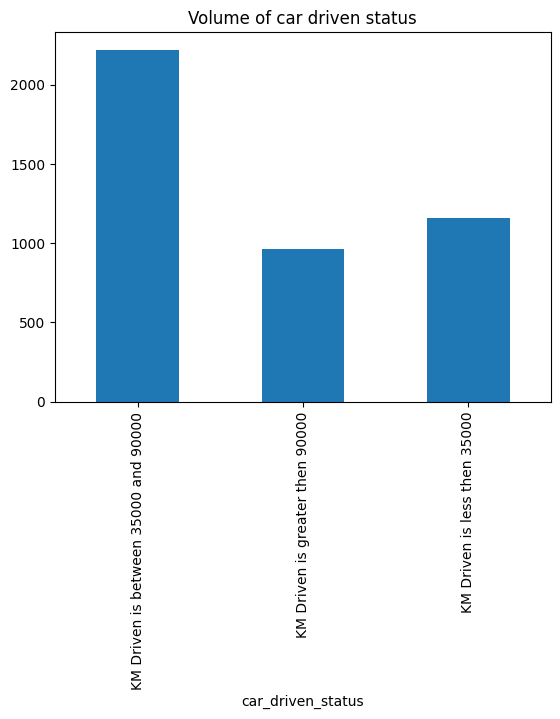

In [52]:
num_car_driven_status = cardekho.groupby('car_driven_status')['name'].count()
num_car_driven_status.plot(kind='bar',title="Volume of car driven status")

In [53]:
# how many are the number of the car_driven_status	with car manufature
cardekho.groupby(['car_driven_status','car manufacture'])['name'].count()

car_driven_status                     car manufacture
KM Driven is between 35000 and 90000  Ambassador           3
                                      Audi                39
                                      BMW                 12
                                      Chevrolet          117
                                      Daewoo               1
                                                        ... 
KM Driven is less then 35000          Skoda                5
                                      Tata                84
                                      Toyota              25
                                      Volkswagen          13
                                      Volvo                1
Name: name, Length: 70, dtype: int64

In [54]:
status_by_brand = cardekho.groupby(['car_driven_status','car manufacture'])['name'].count()


In [55]:
# cost / km driven by fuel
cardekho.groupby('fuel')[['Cost per km driven','selling_price','km_driven']].mean().round(2)

,Cost per km driven,selling_price,km_driven
fuel,,,
CNG,0.39,277174.92,67234.75
Diesel,0.26,669094.25,79630.98
Electric,0.20,310000.00,62000.00
LPG,0.71,167826.04,89634.78
Petrol,0.34,344840.14,52340.08


In [56]:
cardekho['Cost per km driven'].describe()

,Cost per km driven
count,4340.000000
mean,0.300464
std,0.382894
min,0.000000
25%,0.064000
50%,0.167000
75%,0.381000
max,4.000000


<Axes: ylabel='Cost per km driven'>

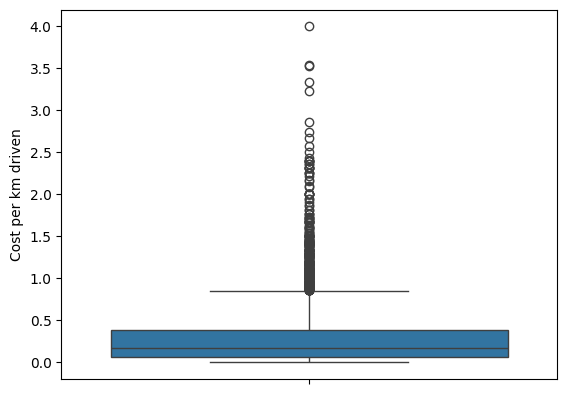

In [57]:
# check for outliers in cost per km driven
sb.boxplot(cardekho['Cost per km driven'])

In [58]:
# check for outliers in km driven and selling price

<Axes: ylabel='km_driven'>

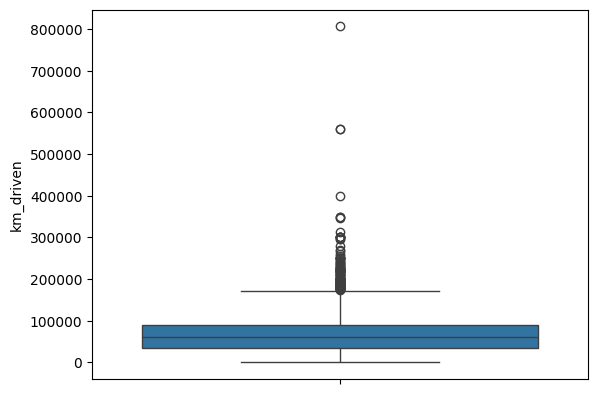

In [59]:
sb.boxplot(cardekho['km_driven'])

<Axes: ylabel='selling_price'>

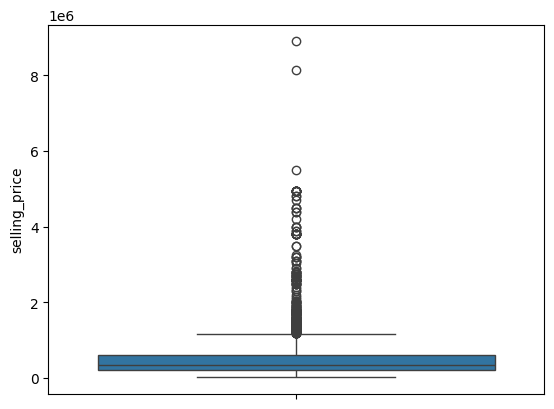

In [60]:
sb.boxplot(cardekho['selling_price'])